In [28]:
# Importation des bibliothèques Python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Importation des données
data = pd.read_csv('data/Social_Network_Ads.csv')
# Dimension du dataset
data.shape

(400, 5)

In [29]:
# Preview du dataset
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [30]:
# Sommaire du dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [31]:
# Recherche des variables catégorielles du dataset
categorical = [var for var in data.columns if data[var].dtype=='O']
print('Il y a {} variable(s) catégorielles.'.format(len(categorical)))
print('Les variables catégorielles sont : {}'.format(categorical))

Il y a 1 variable(s) catégorielles.
Les variables catégorielles sont : ['Gender']


In [32]:
# Affichage des variables catégorielles
data[categorical].head

<bound method NDFrame.head of      Gender
0      Male
1      Male
2    Female
3    Female
4      Male
..      ...
395  Female
396    Male
397  Female
398    Male
399  Female

[400 rows x 1 columns]>

In [33]:
# vérification des valeurs manquantes dans les variables catégorielles
data[categorical].isnull().sum()

Gender    0
dtype: int64

In [34]:
# affichage du nombre de fréquences des valeurs dans les variables catégorielles
for var in categorical:    
    print(data[var].value_counts())

Female    204
Male      196
Name: Gender, dtype: int64


In [35]:
# affichage de la distribution de fréquence des variables catégorielles
for var in categorical:    
    print(data[var].value_counts()/np.float(len(data)))

Female    0.51
Male      0.49
Name: Gender, dtype: float64


C:\Users\AxelArcidiaco\AppData\Local\Temp\ipykernel_1940\2859391165.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(data[var].value_counts()/np.float(len(data)))


In [36]:
# Recherche des variables numériques
numerical = [var for var in data.columns if data[var].dtype!='O']
print('Il y a {} variables numériques.'.format(len(numerical)))
print('Les variables numériques sont : {}'.format(numerical))


Il y a 4 variables numériques.
Les variables numériques sont : ['User ID', 'Age', 'EstimatedSalary', 'Purchased']


In [37]:
# affichage des variables numériques
data[numerical].head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [38]:
# vérification des variables numériques pour voir si certaines sont nulles
data[numerical].isnull().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [39]:
# division des données 
X = data.drop(["Purchased"], axis = 1)
y = data["Purchased"]

In [40]:
# Séparation de X et y en training et testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [41]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((280, 4), (120, 4))

In [42]:
# check data types in X_train
X_train.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
dtype: object

In [43]:
# Affichage des variables catégorielles
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['Gender']

In [44]:
# Affichage des variables numériques
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['User ID', 'Age', 'EstimatedSalary']

In [45]:
# affichage du pourcentage de valeurs manquantes dans les variables catégorielles de l'ensemble d'apprentissage
X_train[categorical].isnull().mean()

Gender    0.0
dtype: float64

In [46]:
# affichage des variables catégorielles avec des données manquantes
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))
    else:
        print("{} ne contient pas de valeur nulle.".format(col))

Gender ne contient pas de valeur nulle.


In [47]:
# vérification des valeurs manquantes dans les variables catégorielles dans X_train
X_train[categorical].isnull().sum()

Gender    0
dtype: int64

In [48]:
# vérification des valeurs manquantes dans les variables catégorielles dans X_test
X_test[categorical].isnull().sum()

Gender    0
dtype: int64

In [49]:
# vérification d'absence de données dans X_train
X_train.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
dtype: int64

In [50]:
# vérification d'absence de données dans X_test
X_test.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
dtype: int64

In [51]:
# Affichage des variables catégorielles
categorical

['Gender']

In [52]:
X_train[categorical].head()

,Gender
92,Male
223,Male
234,Female
232,Male
377,Female


In [57]:
# Encodage des variables
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['User ID', 'Gender', 'Age', 'EstimatedSalary'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [58]:
X_train.head()

,User ID_1,User ID_2,User ID_3,User ID_4,User ID_5,User ID_6,User ID_7,User ID_8,User ID_9,User ID_10,...,EstimatedSalary_100,EstimatedSalary_101,EstimatedSalary_102,EstimatedSalary_103,EstimatedSalary_104,EstimatedSalary_105,EstimatedSalary_106,EstimatedSalary_107,EstimatedSalary_108,EstimatedSalary_109
92,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X_train.shape


(280, 434)

In [60]:
X_test.head()

,User ID_1,User ID_2,User ID_3,User ID_4,User ID_5,User ID_6,User ID_7,User ID_8,User ID_9,User ID_10,...,EstimatedSalary_100,EstimatedSalary_101,EstimatedSalary_102,EstimatedSalary_103,EstimatedSalary_104,EstimatedSalary_105,EstimatedSalary_106,EstimatedSalary_107,EstimatedSalary_108,EstimatedSalary_109
132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [61]:
X_test.shape

(120, 434)

In [62]:
cols = X_train.columns

In [63]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,User ID_1,User ID_2,User ID_3,User ID_4,User ID_5,User ID_6,User ID_7,User ID_8,User ID_9,User ID_10,...,EstimatedSalary_100,EstimatedSalary_101,EstimatedSalary_102,EstimatedSalary_103,EstimatedSalary_104,EstimatedSalary_105,EstimatedSalary_106,EstimatedSalary_107,EstimatedSalary_108,EstimatedSalary_109
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


GaussianNB()

In [65]:
# Prédiction des résultats 
y_pred = gnb.predict(X_test)
y_pred

c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6333


In [67]:
y_pred_train = gnb.predict(X_train)

y_pred_train

c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [68]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [69]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.6333


c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [70]:
# check class distribution in test set

y_test.value_counts()

0    79
1    41
Name: Purchased, dtype: int64

In [71]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[42 37]
 [ 7 34]]

True Positives(TP) =  42

True Negatives(TN) =  34

False Positives(FP) =  37

False Negatives(FN) =  7


<AxesSubplot:>

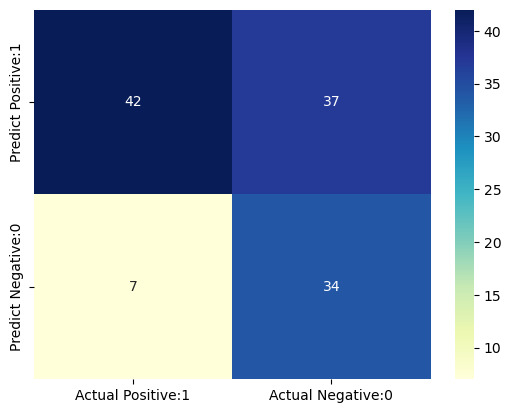

In [72]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.53      0.66        79
           1       0.48      0.83      0.61        41

    accuracy                           0.63       120
   macro avg       0.67      0.68      0.63       120
weighted avg       0.73      0.63      0.64       120



In [74]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6333


In [75]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.5316


In [76]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8571


In [77]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8571


In [78]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.5211


In [79]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.4789


In [80]:
# print the first 10 predicted probabilities of two classes- 0 and 1
y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob

c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[3.00809618e-279, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [3.39162890e-246, 1.00000000e+000],
       [3.26615666e-247, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000]])

In [81]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])
y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,3.008096e-279,1.0
1,0.000000e+00,1.0
2,3.391629e-246,1.0
3,3.266157e-247,1.0
4,0.000000e+00,1.0
5,0.000000e+00,1.0
6,1.000000e+00,0.0
7,0.000000e+00,1.0
8,1.000000e+00,0.0
9,1.000000e+00,0.0


Text(0, 0.5, 'Frequency')

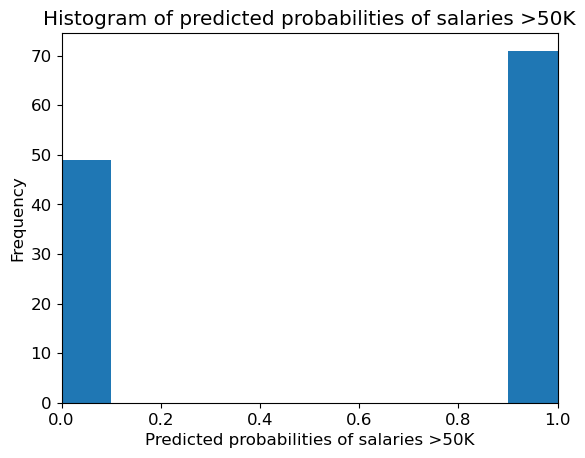

In [82]:
# plot histogram of predicted probabilities
# # adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

In [86]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

TypeError: str() argument 2 must be str, not numpy.ndarray